In [26]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key 

In [27]:
#U.S. Crude Oil Production, Annual
url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.COPRPUS.A"
coal_url = "http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.CLTSPUS_TON.A"


In [28]:
response = requests.get(url).json()
coal_response = requests.get(coal_url).json()

In [29]:
#print(json.dumps(response, indent=2, sort_keys=True))

In [30]:
years = []
values = []

for x in response["series"][0]["data"]:
    years.append(x[0])
    values.append(x[1])
    
#values = response["series"][0]["data"][1]
years  = years[::-1]
values = values[::-1]

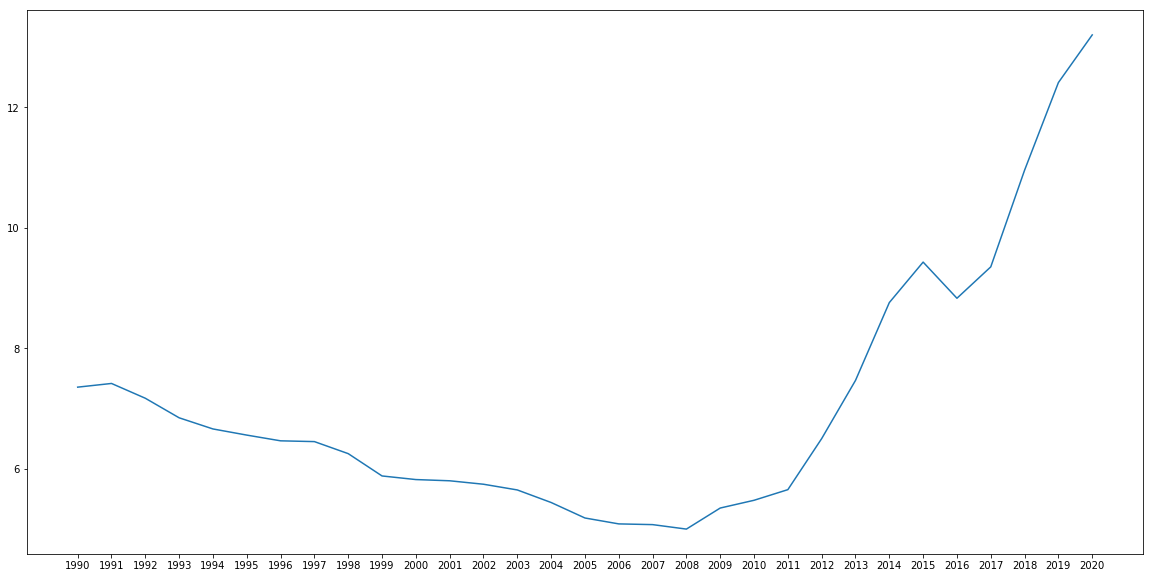

In [31]:
plt.figure(figsize=(20,10))
plt.plot(years, values)


#plt.grid(True)

plt.show()

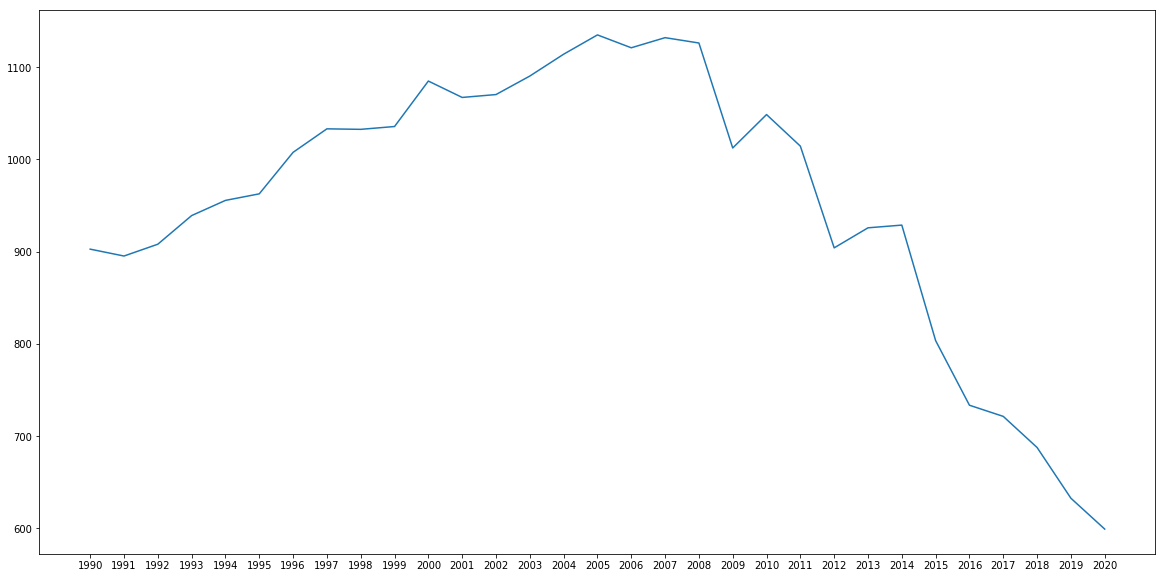

In [32]:
coal_years = []
coal_values = []

for x in coal_response["series"][0]["data"]:
    coal_years.append(x[0])
    coal_values.append(x[1])
    
#values = response["series"][0]["data"][1]
coal_years  = coal_years[::-1]
coal_values = coal_values[::-1]

plt.figure(figsize=(20,10))
plt.plot(years, coal_values)

plt.show()

In [33]:
# US Renewable Energy Supply

renewable_urls = []
renewable_Net_Capacity = []
renewable_years = []
i = 0

renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.WNEPCAPX_US.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.SOEPCAPX_US.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.GEEPCAP_US.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HVEPCAP_US.A")

for renew_url in renewable_urls:
    renewable_response = requests.get(renew_url).json()
    #renewable_Net_Capacity.append(i)
    renewable_Net_Capacity.append([])
    renewable_years.append([])
    for response in renewable_response["series"][0]["data"]:
        renewable_Net_Capacity[i].append(response[1])
        renewable_years[i].append(response[0])
    renewable_Net_Capacity[i] = renewable_Net_Capacity[i][::-1]
    renewable_years[i] = renewable_years[i][::-1]
    #print(len(renewable_Net_Capacity[i]))
    i += 1


    

In [34]:
#renewable_Net_Capacity

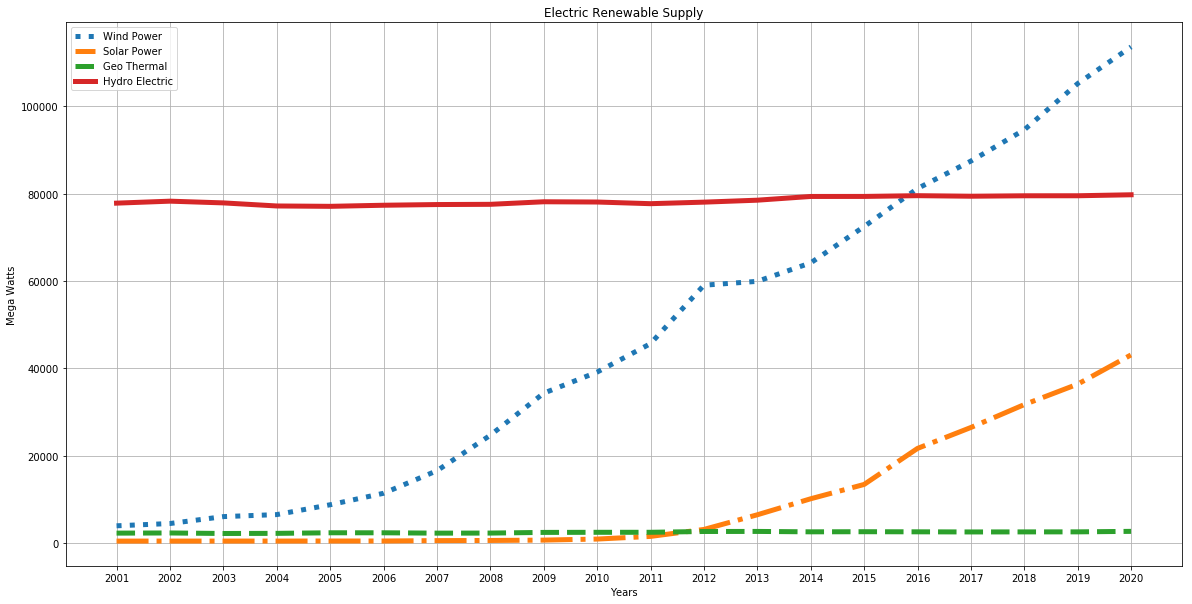

In [35]:
plt.figure(figsize=(20,10))
plt.plot(renewable_years[0], renewable_Net_Capacity[0], label="Wind Power", linewidth=5, linestyle = ':')
plt.plot(renewable_years[0], renewable_Net_Capacity[1], label="Solar Power", linewidth=5, linestyle = '-.')
plt.plot(renewable_years[0], renewable_Net_Capacity[2], label="Geo Thermal", linewidth=5,  linestyle = '--')
plt.plot(renewable_years[0], renewable_Net_Capacity[3], label="Hydro Electric", linewidth=5)
plt.xlabel("Years")
plt.ylabel("Mega Watts")
plt.title("Electric Renewable Supply")

plt.legend()
plt.grid(True)

plt.show()

Text(0.5, 0, 'Years')

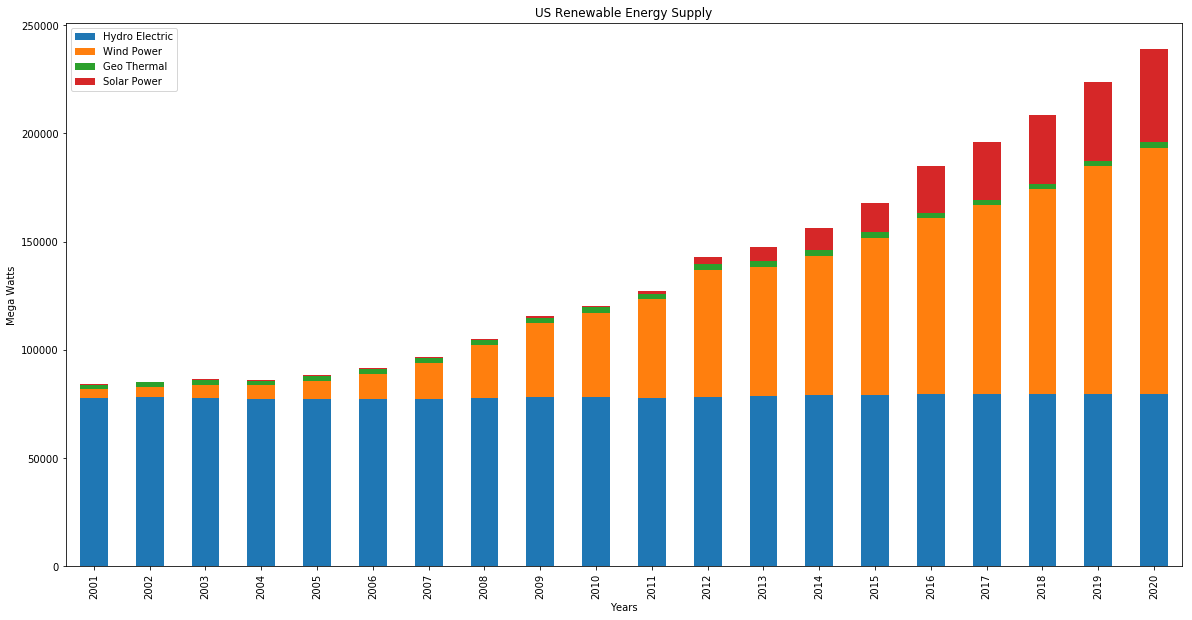

In [36]:

renewable_supply_df = pd.DataFrame({
    'renewable_years' : renewable_years[0],
    'Hydro Electric' : renewable_Net_Capacity[3],    
    'Wind Power' : renewable_Net_Capacity[0],
    'Geo Thermal' : renewable_Net_Capacity[2],
    'Solar Power' : renewable_Net_Capacity[1]
    
})

renewable_supply_df.head()

renewable_supply_df = renewable_supply_df.set_index('renewable_years')

ax = renewable_supply_df.plot(kind='bar', stacked=True, figsize=(20,10), title = 'US Renewable Energy Supply')

ax.set_ylabel("Mega Watts")
ax.set_xlabel("Years")
